<a href="https://colab.research.google.com/github/PaulToronto/Howard-University-Coursera-Linear-Algebra-For-Data-Science-Specialization/blob/main/2_4_3_Solving_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4.3 Solving Applications

https://www.kaggle.com/code/jahirmorenoa/pca-to-the-breast-cancer-data-set

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
#from sklearn.decomposition import PCA
#import pylab as pl
#from itertools import cycle
import plotly.express as px

## Outline of Steps

1. Load the dataset
2. 3D plot of the data
3. Compute the covariance matrix
4. Computer the eigenvalues and eigenvectors
5. Find the optimal number of eigenvalues
6. Find the projection matrix / projection matrix as a dataframe
7. Transform the original data
8. Compute the explained variance ratio
9. Compare to Python's built in PCA

### Load data

In [2]:
path = 'https://raw.githubusercontent.com/PaulToronto/'
path += 'Howard-University-Coursera-Linear-Algebra-For-Data-Science-Specialization/main/'
path += 'data/data.csv'
cancer = pd.read_csv(path)

In [3]:
cancer.shape

(569, 33)

In [4]:
cancer['diagnosis'] = cancer['diagnosis'].map({'M':0, 'B': 1})

In [5]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


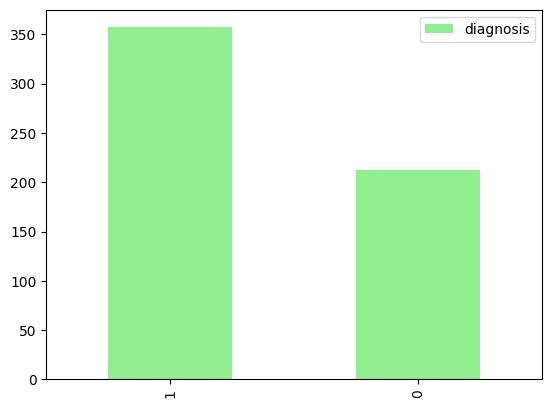

In [6]:
cancer['diagnosis'].value_counts().plot.bar(color='lightgreen')
plt.legend();

In [7]:
target_df = pd.DataFrame([], columns=['diagnosis'])
target_df

,diagnosis


In [8]:
target_df['diagnosis'] = cancer['diagnosis']
target_df.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [9]:
cancer.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True)
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
cancer.shape

(569, 30)

### 3D plot of the data

In [11]:
cancer.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
plt.figure(figsize=(16, 14))
fig = px.scatter_3d(cancer,
                    x='radius_mean',
                    y='concavity_worst',
                    z='perimeter_mean',
                    color='compactness_worst',
                    labels={'class': 'compactness_worst'})
fig.update_traces(marker=dict(size=13,
                              line=dict(width=1, color='green')),
                  selector=dict(mode='markers'))

<Figure size 1600x1400 with 0 Axes>

### Scaling the data

In [13]:
def StandardScaler(data):
    scaled_df = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return scaled_df

In [14]:
scaled_cancer = StandardScaler(cancer)
scaled_cancer = np.around(scaled_cancer, 3)
scaled_cancer

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097,-2.073,1.270,0.984,1.568,3.284,2.653,2.532,2.218,2.256,...,1.887,-1.359,2.304,2.001,1.308,2.617,2.110,2.296,2.751,1.937
1,1.830,-0.354,1.686,1.909,-0.827,-0.487,-0.024,0.548,0.001,-0.869,...,1.806,-0.369,1.535,1.890,-0.376,-0.430,-0.147,1.087,-0.244,0.281
2,1.580,0.456,1.567,1.559,0.942,1.053,1.363,2.037,0.940,-0.398,...,1.512,-0.024,1.347,1.456,0.527,1.083,0.855,1.955,1.152,0.201
3,-0.769,0.254,-0.593,-0.764,3.284,3.403,1.916,1.452,2.867,4.911,...,-0.281,0.134,-0.250,-0.550,3.394,3.893,1.990,2.176,6.046,4.935
4,1.750,-1.152,1.777,1.826,0.280,0.539,1.371,1.428,-0.010,-0.562,...,1.299,-1.467,1.339,1.221,0.221,-0.313,0.613,0.729,-0.868,-0.397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.111,0.721,2.061,2.344,1.042,0.219,1.947,2.321,-0.313,-0.931,...,1.901,0.118,1.753,2.015,0.378,-0.273,0.665,1.629,-1.360,-0.709
565,1.705,2.085,1.616,1.724,0.102,-0.018,0.693,1.264,-0.218,-1.059,...,1.537,2.047,1.422,1.495,-0.691,-0.395,0.237,0.734,-0.532,-0.974
566,0.702,2.046,0.673,0.578,-0.840,-0.039,0.047,0.106,-0.809,-0.896,...,0.561,1.375,0.579,0.428,-0.810,0.351,0.327,0.414,-1.105,-0.318
567,1.838,2.336,1.983,1.735,1.526,3.272,3.297,2.659,2.137,1.044,...,1.961,2.238,2.304,1.653,1.430,3.905,3.198,2.290,1.919,2.220


### Computing the Covariance Matrix

In [15]:
def CovarianceCompute(df):
    length_data = df.shape[0]
    covariance = df.T.dot(df) / length_data
    return covariance

In [16]:
cova_mat = CovarianceCompute(scaled_cancer)
cova_mat = np.round(cova_mat, 3)
cova_mat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
texture_mean,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
perimeter_mean,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
area_mean,0.987,0.321,0.987,1.000,0.177,0.498,0.686,0.823,0.151,-0.283,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
smoothness_mean,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
compactness_mean,0.506,0.237,0.557,0.498,0.659,1.000,0.883,0.831,0.603,0.565,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
concavity_mean,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
concave points_mean,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.463,0.167,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
symmetry_mean,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.463,1.000,0.480,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
fractal_dimension_mean,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,...,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


In [17]:
scaled_cancer.shape

(569, 30)

In [18]:
cova_mat.shape

(30, 30)

### Eigen Decomposition on Covariance Matrix

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(cova_mat)

In [20]:
eigenvalues

array([ 1.32812487e+01,  5.69087858e+00,  2.81819924e+00,  1.98041126e+00,
        1.64831233e+00,  1.20703769e+00,  6.75484004e-01,  4.76543075e-01,
        4.16797944e-01,  3.50268319e-01,  2.94860899e-01,  2.61486599e-01,
        2.41761824e-01,  1.56848230e-01,  9.43777902e-02,  7.98977875e-02,
        5.97178579e-02,  5.29795207e-02,  4.88690273e-02, -3.31211897e-04,
        1.37012272e-03,  1.11732156e-03,  6.97515675e-03,  8.50626113e-03,
        3.12791781e-02,  2.99008201e-02,  2.75351866e-02,  2.40832179e-02,
        1.78626634e-02,  1.57205741e-02])

In [21]:
eigenvectors

array([[ 2.18914924e-01, -2.33898443e-01, -8.58267569e-03,
         4.13403070e-02, -3.75651463e-02,  1.89951506e-02,
         1.24799663e-01, -9.28118128e-03, -2.22592130e-01,
        -9.59612961e-02, -4.08763610e-02,  5.08049023e-02,
        -1.38743067e-02,  5.93854750e-02,  5.31549792e-02,
        -1.49583453e-01, -1.97167900e-01, -1.64352579e-01,
         2.14555789e-01, -6.73231404e-01, -3.07426660e-01,
         1.09868592e-01, -2.13020158e-01, -1.33293559e-01,
        -4.59674024e-02, -7.37808292e-02, -6.60732775e-02,
        -8.40706598e-02,  1.79803621e-01, -4.02687460e-03],
       [ 1.03745791e-01, -5.97599651e-02,  6.45218375e-02,
        -6.02960786e-01,  4.95559761e-02, -3.31189490e-02,
        -1.13880139e-02,  1.31306860e-01,  1.13654632e-01,
        -2.41387552e-01,  3.03560847e-01,  2.48396749e-01,
        -2.06972372e-01, -1.98431171e-02,  1.03573439e-01,
        -1.63358825e-01,  3.39999586e-02,  3.15864065e-02,
         5.61988760e-02,  1.74808334e-03,  1.19545086e-

In [22]:
np.array([1, 3, 2, 3, 0, -1]), np.array([1, 3, 2, 3, 0, -1]).argmax()

(array([ 1,  3,  2,  3,  0, -1]), 1)

In [23]:
eigenvectors.argmax()

680

In [24]:
np.array([[1, 2, 3], [7, 3, 2], [1, 2, 3]]).argmax()

3

In [25]:
max_value = 0
for i, v in enumerate(eigenvectors.flatten()):
    if v > max_value:
        max_value = v
        print(i)

0
40
55
79
680


In [26]:
indices = eigenvalues.argsort()[::-1]
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 24, 25, 26, 27, 28, 29, 23, 22, 20, 21, 19])

In [27]:
eigenvalues.argmax(), eigenvalues.argmin()

(0, 19)

In [28]:
eigenvalues

array([ 1.32812487e+01,  5.69087858e+00,  2.81819924e+00,  1.98041126e+00,
        1.64831233e+00,  1.20703769e+00,  6.75484004e-01,  4.76543075e-01,
        4.16797944e-01,  3.50268319e-01,  2.94860899e-01,  2.61486599e-01,
        2.41761824e-01,  1.56848230e-01,  9.43777902e-02,  7.98977875e-02,
        5.97178579e-02,  5.29795207e-02,  4.88690273e-02, -3.31211897e-04,
        1.37012272e-03,  1.11732156e-03,  6.97515675e-03,  8.50626113e-03,
        3.12791781e-02,  2.99008201e-02,  2.75351866e-02,  2.40832179e-02,
        1.78626634e-02,  1.57205741e-02])

In [29]:
eigenvectors_df = pd.DataFrame(eigenvectors)
eigenvectors_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.218915,-0.233898,-0.008583,0.041340,-0.037565,0.018995,0.124800,-0.009281,-0.222592,-0.095961,...,-0.307427,0.109869,-0.213020,-0.133294,-0.045967,-0.073781,-0.066073,-0.084071,0.179804,-0.004027
1,0.103746,-0.059760,0.064522,-0.602961,0.049556,-0.033119,-0.011388,0.131307,0.113655,-0.241388,...,0.001195,-0.005337,-0.019397,-0.033700,-0.177117,0.488311,-0.023200,-0.012724,-0.093838,0.071805
2,0.227550,-0.215213,-0.009459,0.041870,-0.037566,0.017219,0.114103,-0.019480,-0.222909,-0.087628,...,0.076736,0.517555,-0.074653,-0.060530,-0.021748,-0.067072,-0.079984,-0.029663,0.120132,-0.001110
3,0.221011,-0.231046,0.028765,0.053560,-0.010408,-0.001547,0.051546,0.034350,-0.195209,-0.074035,...,0.217780,-0.457543,0.515844,0.292711,-0.106588,-0.002849,-0.100168,0.007704,-0.080277,-0.188216
4,0.142597,0.186081,-0.104192,0.159413,0.365087,-0.286252,0.141095,-0.290032,0.006640,0.068119,...,-0.006491,0.001471,0.068104,-0.045702,0.000101,-0.104481,-0.085102,-0.018075,-0.066985,0.031401
5,0.239283,0.151910,-0.074094,0.031740,-0.011746,-0.014038,-0.030557,-0.151666,-0.165740,-0.013001,...,0.000676,-0.065199,0.118499,0.235848,0.516058,0.112203,0.095417,0.067461,0.114527,0.403126
6,0.258371,0.060189,0.002682,0.019265,-0.086289,-0.009583,0.107734,-0.072179,0.040057,0.134409,...,-0.090020,0.011181,0.308925,-0.574856,-0.034089,-0.016075,0.222452,0.300027,-0.039355,-0.116331
7,0.260855,-0.034727,-0.025607,0.065575,0.044035,-0.052218,0.150706,-0.152494,-0.110651,-0.010834,...,0.045133,-0.025193,-0.409664,0.434736,-0.216099,-0.005384,0.315369,-0.093799,-0.107028,-0.173414
8,0.138192,0.190416,-0.040256,0.067067,0.306017,0.356487,0.094198,-0.230959,0.259128,-0.570017,...,-0.000529,-0.005766,-0.016527,-0.011558,0.013330,-0.089646,-0.003613,-0.053075,-0.021231,-0.024149
9,0.064365,0.366596,-0.022458,0.048431,0.044657,-0.119659,-0.295514,-0.177027,-0.122357,-0.082266,...,0.008256,0.009425,-0.112655,-0.076381,-0.203798,-0.024398,-0.286228,-0.052672,0.140437,-0.207497


### Looking for the optimal number of eigenvectors

In [30]:
indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]
sorted_eig_pairs = [(np.round(np.abs(eigenvalues[i]), 3),
                     eigenvectors[:, i]) for i in range(len(eigenvalues))]
print('\n Sorted Eign-Pair(descending order)')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print('eignvec_{0} : {1}'.format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])

print('\nTotal Variance (sum of all eigenvalues) : ', round(sum(sorted_eigenValues), 3))


 Sorted Eign-Pair(descending order)
eignvec_1 : 13.281
eignvec_2 : 5.691
eignvec_3 : 2.818
eignvec_4 : 1.98
eignvec_5 : 1.648
eignvec_6 : 1.207
eignvec_7 : 0.675
eignvec_8 : 0.477
eignvec_9 : 0.417
eignvec_10 : 0.35
eignvec_11 : 0.295
eignvec_12 : 0.261
eignvec_13 : 0.242
eignvec_14 : 0.157
eignvec_15 : 0.094
eignvec_16 : 0.08
eignvec_17 : 0.06
eignvec_18 : 0.053
eignvec_19 : 0.049
eignvec_20 : 0.031
eignvec_21 : 0.03
eignvec_22 : 0.028
eignvec_23 : 0.024
eignvec_24 : 0.018
eignvec_25 : 0.016
eignvec_26 : 0.009
eignvec_27 : 0.007
eignvec_28 : 0.001
eignvec_29 : 0.001
eignvec_30 : 0.0

Total Variance (sum of all eigenvalues) :  30.0


### Kaiser's Criterion (Looking for optimal number of eigenvalues)

In [31]:
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 0.47]
print("According to Kaiser's Stopping Rule: ")
print('Number of PCS to be considered for PCA is {}'.format(str(len(best_eig_pairs))))
print('Their Eigenvalues are : {}'.format(str(best_eig_pairs)))

According to Kaiser's Stopping Rule: 
Number of PCS to be considered for PCA is 8
Their Eigenvalues are : [13.281, 5.691, 2.818, 1.98, 1.648, 1.207, 0.675, 0.477]


### Plotting

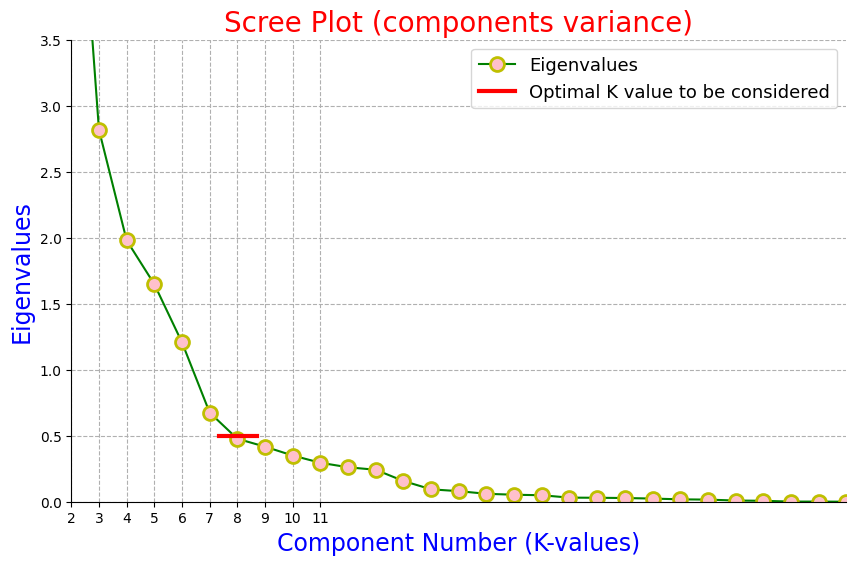

In [32]:
fig = plt.figure(figsize=(10, 6))
plt.title('Scree Plot (components variance)', color='red', fontsize=20)
plt.xticks(np.arange(1, 12, 1))
plt.xlim(2, 30)
plt.ylim(0, 3.5)
plt.ylabel('Eigenvalues', fontsize=17, color='blue')
plt.xlabel('Component Number (K-values)', fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 31), sorted_eigenValues, linestyle='-',
         label='Eigenvalues', markerfacecolor='pink',
         markeredgecolor='y', markeredgewidth=2, marker='o',markersize=10, color='g')
plt.plot([7.35, 8.7], [0.5, 0.5], color='red', linestyle='-', lw=3, label='Optimal K value to be considered')
plt.legend(loc=1, prop={'size': 13})
sns.despine()

### Transforming the original data

Now, we pick the K-value (number of components) where the slope starts flattening.